## Introduction
---
- We have a dataset containing information about houses and their features. 
- The goal is to predict house `price`s based on these features.

- Our dataset contains:
    * id - Unique ID for each home sold
    * date - Date of the home sale
    * price - Price of each home sold
    * bedrooms - Number of bedrooms
    * bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    * sqft_living - Square footage of the apartments interior living space
    * sqft_lot - Square footage of the land space
    * floors - Number of floors
    * waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    * view - An index from 0 to 4 of how good the view of the property was
    * condition - An index from 1 to 5 on the condition of the apartment,
    * grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    * sqft_above - The square footage of the interior housing space that is above ground level
    * sqft_basement - The square footage of the interior housing space that is below ground level
    * yr_built - The year the house was initially built
    * yr_renovated - The year of the house’s last renovation
    * zipcode - What zipcode area the house is in
    * lat - Lattitude
    * long - Longitude
    * sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    * sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


## Initial libraries and functions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
def model_evaluation(y_test, y_hat) -> None:
    print('R2 score            = ', r2_score(y_test, y_hat))
    print('Mean absolute error = ', mean_absolute_error(y_test, y_hat))
    print('Mean squared error  = ', mean_squared_error(y_test, y_hat))

## Exploratory data analysis (EDA)
---
- Dataset looks clean, doesn't require cleaning that much.

In [3]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum(), df.duplicated().sum()

(id               0
 date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 grade            0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 zipcode          0
 lat              0
 long             0
 sqft_living15    0
 sqft_lot15       0
 dtype: int64,
 0)

### Preprocessing
---
- Some columns are unnecessary for our analysis.

In [6]:
df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


### Quick look at what we got here
---

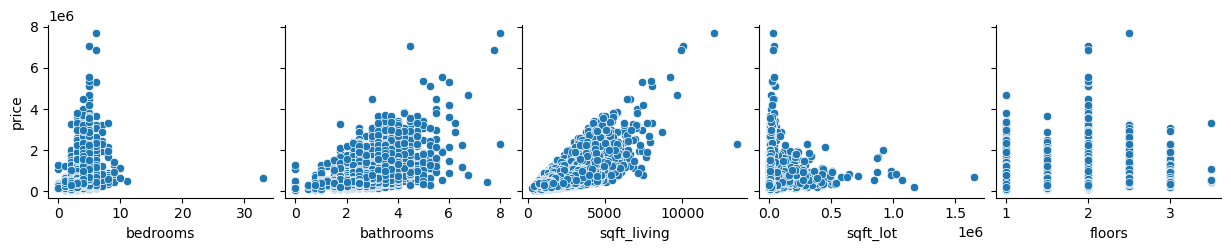

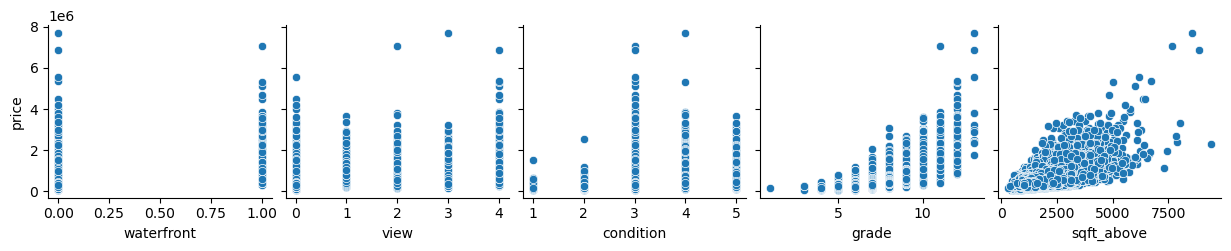

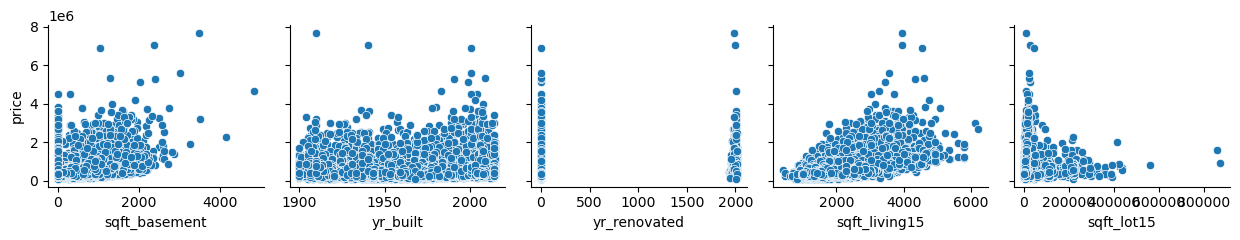

In [7]:
sns.pairplot(data=df, x_vars=df.columns[1:6], y_vars='price')
sns.pairplot(data=df, x_vars=df.columns[6:11], y_vars='price')
sns.pairplot(data=df, x_vars=df.columns[11:], y_vars='price')

plt.tight_layout()

## Simple linear regression
---
- As an example, we will apply simple linear regression between `sqft_living` and `price`.
- Based on the charts above, we can observe a clear relationship between these two features.

### Preprocessing

In [8]:
X, y = df[['sqft_living']], df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training our model

In [9]:
model = LinearRegression().fit(X_train, y_train)

print('Coefficient : ', model.coef_)
print('Intercept : ', model.intercept_)

Coefficient :  [279.95320331]
Intercept :  -42143.81223974936


### Plotting and evaluating our model

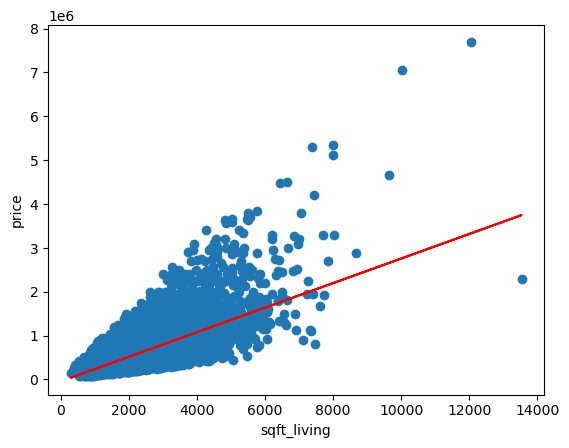

In [10]:
plt.scatter(X_train, y_train)

plt.xlabel('sqft_living')
plt.ylabel('price')

plt.plot(X_train , X_train * model.coef_ + model.intercept_, 'r')

In [11]:
y_hat = model.predict(X_test)

model_evaluation(y_test, y_hat)

R2 score            =  0.48016543545405055
Mean absolute error =  173181.02205554713
Mean squared error  =  69690651157.91177


## Multiple linear regression
---
- Because we have multiple features, it is better to normalize our data before proceeding.

### Preprocessing

In [12]:
X, y = df.drop('price', axis=1), df[['price']]

scaler = StandardScaler()
X, y = scaler.fit_transform(X), scaler.fit_transform(y)

X, y

(array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.21012839,
         -0.9433552 , -0.26071541],
        [-0.39873715,  0.1756067 ,  0.53363434, ...,  4.7466776 ,
         -0.43268619, -0.18786773],
        [-1.47395936, -1.44746357, -1.42625404, ..., -0.21012839,
          1.07013975, -0.17237524],
        ...,
        [-1.47395936, -1.77207762, -1.15404732, ..., -0.21012839,
         -1.41025258, -0.39414129],
        [-0.39873715,  0.50022075, -0.52252773, ..., -0.21012839,
         -0.8412214 , -0.42051149],
        [-1.47395936, -1.77207762, -1.15404732, ..., -0.21012839,
         -1.41025258, -0.41794772]]),
 array([[-0.86671733],
        [-0.00568792],
        [-0.98084935],
        ...,
        [-0.37586519],
        [-0.38158814],
        [-0.58588173]]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training our model

In [14]:
model = LinearRegression().fit(X_train, y_train)

print('Coefficient : ', model.coef_)
print('Intercept : ', model.intercept_)

Coefficient :  [[-9.59841060e-02  1.11742619e-01  4.74355183e+12  2.51728193e-03
   3.27016955e-02  1.23587596e-01  1.00098040e-01  3.17985119e-02
   3.89002136e-01 -4.27691372e+12 -2.28580594e+12 -2.90261264e-01
   1.10426709e-02  4.35980504e-02 -4.20129769e-02]]
Intercept :  [-0.00086562]


### Evaluating our model

In [15]:
y_hat = model.predict(X_test)

model_evaluation(y_test, y_hat)

R2 score            =  0.6711483749115523
Mean absolute error =  0.37868782311127713
Mean squared error  =  0.3500095433300913


### Conclusion: Effective features
---
- let's see each features weights and effects on our model in descending order.

In [16]:
pd.DataFrame(model.coef_,columns=df.columns[1:]).T.sort_values(by=0, ascending=False)

,0
sqft_living,4.743552e+12
grade,3.890021e-01
waterfront,1.235876e-01
bathrooms,1.117426e-01
view,1.000980e-01
sqft_living15,4.359805e-02
floors,3.270170e-02
condition,3.179851e-02
yr_renovated,1.104267e-02
sqft_lot,2.517282e-03


---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>